In [31]:
import pyvisa
import time
import pandas as pd
import re
import numpy as np
from IPython.display import display
from ipywidgets import Button 

In [32]:
rm = pyvisa.ResourceManager()
FreqStart=1000
FreqStep=200
FreqStop =7000
df = pd.DataFrame(columns=['Depth','Capicity'])
y={"depth":0,"dir":0}

rm.list_resources()



('ASRL9::INSTR',)

In [33]:

button1 = Button(description="Измерить!!"+str(y["depth"]), 
                        button_style='success')

def mesure(obj): # Описываем обработчик события    
    global df
    if y["dir"]==0: y["depth"]+=1
    if y["dir"]==1: y["depth"]-=1
    if y["depth"]==15: y["dir"]=1
    if y["depth"]==0: y["dir"]=0      
        
    for i in range(5):
        vm=rm.open_resource('ASRL9::INSTR')
        vm.write_raw(b'\x55\x55\x00\x00\xAA')
        ansver=vm.read_bytes(16)
        #if hex(ansver[9])==52:
        sum=(((ansver[7]<<8)+ansver[6]+ansver[8])-2)/100
        vm.close()
        time.sleep(1)
        #print(hex(ansver[9]))
        button1.description="Глубина "+str(y["depth"])+" км"
        #print(sum,' измерение',str(i), 'глубина',str(y["depth"]))
        df2 = pd.DataFrame([{'Depth': y["depth"], 'Capicity': sum}])
        df=pd.concat([df, df2])
    print('Значения для глубины '+str(y["depth"])+' км записаны' )

            
        #df = df.append(df2, ignore_index = True)  
button1.on_click(mesure) # Назначаем этот обработчик на событие "on_click"

display(button1) # Отображаем кнопку

Button(button_style='success', description='Измерить!!0', style=ButtonStyle())

Значения для глубины 1 км записаны


In [34]:
 df

,Depth,Capicity
0,1,31.62
0,1,31.62
0,1,31.61
0,1,31.61
0,1,31.61


<AxesSubplot: xlabel='Depth'>

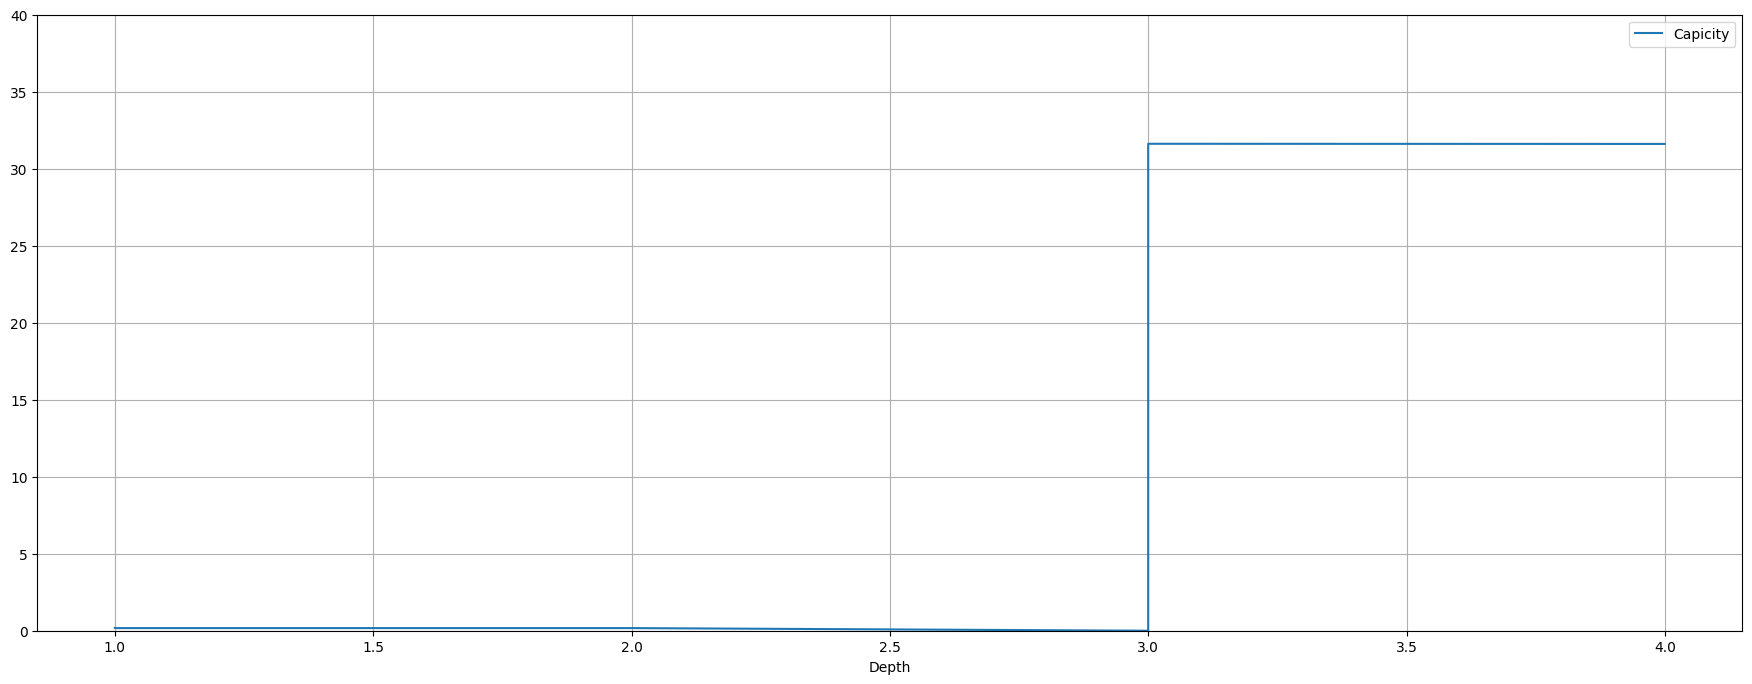

In [30]:
df.plot(x='Depth', y='Capicity',figsize=( 22 , 8),ylim=(0, 40),grid=(1,1))